In [0]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Colab\ Notebooks  

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks


# <center> IMPORTS AND DEF FUNCTIONS

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
from sklearn  import preprocessing, decomposition, base
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, SGDClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, validation_curve, KFold
from sklearn.model_selection import RandomizedSearchCV, cross_validate, ParameterGrid
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import roc_curve, f1_score, precision_score, recall_score, auc, mean_absolute_error, mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.formula.api as sm
from sklearn.svm import SVC

import xgboost as xgb
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_importance
import time

import copy 
import pickle
from IPython.display import display
from matplotlib import interactive 
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
pd.options.display.max_columns = 40

from datetime import*
import time


#from utils import *

colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd:goldenrod', 'xkcd:cadet blue', 
          'xkcd:scarlet']

""" IMPORTING MODEL
# serialize weights to HDF5
#history.save("history_base_25.h5")
from keras.models import load_model
 
# load model
model = load_model('model.h5')"""

os.chdir('./Colab_datasets/Final_versions')
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/Colab_datasets/Final_versions'

In [0]:
from sklearn import datasets, linear_model
from keras import regularizers
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint

import copy
from keras.layers import *   #è incluso Flatten
from keras.models import *
from keras.layers import Concatenate, concatenate

from Target_enc_class import *

In [0]:
def container_modello(task):
    """Return un diz con chiavi X_train, X_test, y_train, y_test, best_estimator
    caso: 'classo', 'rollingreg', 'rollingreg' """
    
    if task== 'class':
        X_train= container_class['X_train']
        X_test= container_class['X_test']
        y_train= container_class['ytrain']
        y_test= container_class['ytest']
        #best_est= best_class_rf
        #feat_imp= feats_imp_class
        
    elif task== 'reg':
        X_train= container_reg['X_train']
        X_test= container_reg['X_test']
        y_train= container_reg['ytrain']
        y_test= container_reg['ytest']
        #best_est= best_reg_rf
        #feat_imp= feats_imp_rfreg
        
    return {'X_train': X_train, 'X_test': X_test, 'ytrain': y_train, 'ytest': y_test}


def summary_classifier(classifier, x_train, y_train, y_test, predictions):
    
    #posso predire scaled_test, quello con tutte le 369 feauters: lui da solo ne toglierà alcune con lasso, è gia incorporato
    print('\n\033[1mtrain accuracy TP+TN/tot is {} \033[0m'.format(round(accuracy_score(y_train, classifier.predict(x_train)),3)))
    print('\033[1mtest accuracy TP+TN/tot is {} \033[0m'.format(round(accuracy_score(y_test, predictions),3)))
    #print("cross validation accuracy sul train è: ", cross_val_score(estimator = grid_fit.best_estimator_, X = scaled_train, y = Y_train, cv = 10).mean())
    print('\n\033[1mCLASSIFICATION REPORT\033[0m: \n', classification_report(y_test, predictions))
    print('\033[1mCONFUSION MATRIX\033[0m \n', confusion_matrix(y_test, predictions))
    #"""ROC CURVE SCORES (non esiste per multiclass classification)"""
    #print('roc curve train is {a}, roc test is {b}'.format(a= roc_auc_score(y_train, classifier.predict(x_train), average="weighted"), b= roc_auc_score(y_test, predictions, average="weighted")))
    print('\n\033[1mF1 train is {a}, F1 test is {b} \033[0m'.format(a= round(f1_score(y_train, classifier.predict(x_train), 
                                                                average='weighted'),3), b= round(f1_score(y_test, predictions, average='weighted'),3)))
    
def summary_grid(grid_fit, scaled_train, Y_train, scaled_test, Y_test):
    """ AFTER A GRIDSEARCH, I CONSIDER RELEVANT ANALYZING THE FOLLOWING SCORES
    NB: Per accuracy il Train è tutto l'80%, senza split con validation, e test sul 20%. Per F1-weighted invece validation score, l ultimo,
    è valutato come media dello score sulle K folds (5) del train, quindi su 80%/5..."""
    
    print('best param combination: ', grid_fit.best_params_)   #'C': 0.357
    #print('best estimator: ', grid_fit.best_estimator_)
    #print('predictions', grid_fit.predict(scaled_test))
    
    #posso predire scaled_test, quello con tutte le 369 feauters: lui da solo ne toglierà alcune con lasso, è gia incorporato
    print('\n\033[1m Train Accuracy is {}\033[0m'.format(round(accuracy_score(Y_train, grid_fit.predict(scaled_train)),3)))
    print('\033[1m Test Accuracy is {}\033[0m'.format(round(accuracy_score(Y_test, grid_fit.predict(scaled_test)),3)), '\033[0m')
    #print("\033[1mcross validation accuracy sul train è: ", round(cross_val_score(estimator = grid_fit.best_estimator_, X = scaled_train, y = Y_train, cv = 5).mean(),3), '\033[0m')
    print('\n\033[1mCLASSIFICATION REPORT\033[0m: \n', classification_report(Y_test, grid_fit.best_estimator_.predict(scaled_test)))
    print('\033[1mCONFUSION MATRIX\033[0m \n', confusion_matrix(Y_test, grid_fit.best_estimator_.predict(scaled_test)))
    #"""ROC CURVE SCORES (non esiste per multiclass classification)"""
    #print('roc curve train is {a}, roc test is {b}'.format(a= roc_auc_score(Y_train, grid_fit.predict(scaled_train)), b= roc_auc_score(Y_test, grid_fit.predict(scaled_test))))
    print('\n\033[1mF1 TRAIN: {a}, \nVALIDATION F1 (averaged on 5 folds): {b} \033[0m \n\033[1mF1 TEST: {c}\033[0m'.format(
        a= round(f1_score(Y_train, grid_fit.predict(scaled_train), average='weighted' ),3), 
        b= round(grid_fit.best_score_,3), #data combinazione parametri, è score medio (qui F1, vedi run_model) valutato sulle K cross validation. quindi è sempre una validation performance (nel mio caso f1 weighted)
        c= round(f1_score(Y_test, grid_fit.predict(scaled_test), average='weighted'),3)))   

In [0]:
def df_cv_results(grid_fit, n_to_show= 5):
    df= pd.DataFrame(grid_fit.cv_results_)
    df= df[[col for col in df.columns if 'param_' in col]+['mean_test_score', 'mean_train_score']]
    return df.sort_values(by= 'mean_test_score', ascending= False).head(n_to_show)

def after_nn(grid, show_df= False, n_to_show= 5):
  print('best_score and best params:', grid.best_score_, grid.best_params_)
  results= df_cv_results(grid)
  return results.head(n_to_show)

def title_ticks_ecc(title, xlabel, ylabel, new_fig= True , figsize= (10,6)):
    if new_fig== True:
        plt.figure(figsize=figsize)
        
    plt.title(title, color='red', fontsize= 18, pad= 13)
    plt.xlabel(xlabel, color='red', fontsize= 14)
    plt.ylabel(ylabel, color='red', fontsize= 14)
    plt.xticks(fontsize=12, color='blue')
    plt.yticks(fontsize=12, color='blue')

def plot_model_history(history, measures = ["acc"]):

  plt.style.use("ggplot")
  (fig, ax) = plt.subplots(1, 3, figsize=(20, 5))

  # loop over the accuracy names
  for (i, l) in enumerate(measures):
    # plot the loss for both the training and validation data
    ax[i].set_xlabel("Epoch #")
    if l!= 'loss':
      ax[i].set_title("{}".format(l ))
      ax[i].set_ylabel("{}".format(l))
    else:
      ax[i].set_title("Loss")
      ax[i].set_ylabel("Loss")
    #ax[i].plot(np.arange(0, epochs), history.history[l], label=l)
    #ax[i].plot(np.arange(0, epochs), history.history["val_" + l], label="val_" + l)
    ax[i].plot(history.history[l], label=l)
    ax[i].plot( history.history["val_" + l], label="val_" + l)
    ax[i].legend()

  plt.tight_layout() 
  plt.show()
  plt.close()

**<center> Imports**

In [0]:
with open('./final_class_10sn.pickle', 'rb') as cont_class:
    cont_class= pickle.load(cont_class)
    
with open('./final_reg_10sn.pickle', 'rb') as cont_reg:
    cont_reg= pickle.load(cont_reg)
    
containers= [cont_class, cont_reg]
    
X_train_class= cont_class['X_train']
X_test_class= cont_class['X_test']    


#(34379, 13) (6068, 13) (28732, 17) (5032, 17)
print('Shapes Static and Rolling25', X_train_class.shape, X_test_class.shape)  

Shapes Static and Rolling25 (259053, 27) (45511, 27)


In [0]:
binary_feats= ['Variant code', 'Contract Type', 'Main material group qualification flag', 'Professional services flag' ]
for col in binary_feats:
    print(X_train_class[col].nunique())

2
2
2
2


In [0]:
FROM_REG_TO_BINARY= True
if FROM_REG_TO_BINARY:
  cont_class['ytrain']= cont_class['ytrain'].apply(lambda x: 1 if x>=90 else 0)
  cont_class['ytest']= cont_class['ytest'].apply(lambda x: 1 if x>=90 else 0)

In [0]:
ytrain_binary= ytrain_class= cont_class['ytrain']
ytest_binary= ytest_class= cont_class['ytest']
cont_class['ytrain'].value_counts()

0    182690
1     76363
Name: target_class, dtype: int64

# <center> Preprocessing

In [0]:
container_class= cont_class
feats_binarie= ['Variant code', 'Contract Type', 'Main material group qualification flag', 'Professional services flag']

new_feats= ['num_orders', '%avg_importo', '%std_importo', '%avg_intervals', '%std_intervals', 'life%', '%days_from_last_order', '%days_til_first_order', 'True/Ideal Slope', 
             'ordini/mese']
feats_create= new_feats
encoded_cols= [col for col in container_class['X_train'].columns if col.endswith('ENC') ] 

for col in container_class['X_train'][encoded_cols]:
    print('Redoundancy {}-->  {}'.format(col, container_class['X_train'][col].value_counts().sort_values(ascending= False).iloc[0]))

print('\nIn test set no Noise, perciò redoundancy più alta\n')
for col in container_class['X_test'][encoded_cols]:
    print('Redoundancy {}-->  {}'.format(col, container_class['X_test'][col].value_counts().sort_values(ascending= False).iloc[0]))

Redoundancy VMD Code_FINAL_ENC-->  11
Redoundancy QMG Code_FINAL_ENC-->  7
Redoundancy Purchase Unit Code_FINAL_ENC-->  9
Redoundancy Global Business line_FINAL_ENC-->  11
Redoundancy Geographical Area_FINAL_ENC-->  14
Redoundancy Supplier Type Code_FINAL_ENC-->  15
Redoundancy Purchase document type_FINAL_ENC-->  13
Redoundancy Job type_FINAL_ENC-->  14

In test set no Noise, perciò redoundancy più alta

Redoundancy VMD Code_FINAL_ENC-->  8407
Redoundancy QMG Code_FINAL_ENC-->  4103
Redoundancy Purchase Unit Code_FINAL_ENC-->  8801
Redoundancy Global Business line_FINAL_ENC-->  17281
Redoundancy Geographical Area_FINAL_ENC-->  35770
Redoundancy Supplier Type Code_FINAL_ENC-->  42828
Redoundancy Purchase document type_FINAL_ENC-->  27914
Redoundancy Job type_FINAL_ENC-->  28584


In [0]:
container_class['X_train'].head(2)

,Variant code,Contract Type,Header amount,Main material group qualification flag,Professional services flag,num_orders,%avg_importo,%std_importo,%avg_intervals,%std_intervals,life%,%days_til_first_order,durata_nominale_gg,percentage_used,ordini/mese,True/Ideal Slope,Accel_orders,Accel_%used,%days_from_last_order,VMD Code_FINAL_ENC,QMG Code_FINAL_ENC,Purchase Unit Code_FINAL_ENC,Global Business line_FINAL_ENC,Geographical Area_FINAL_ENC,Supplier Type Code_FINAL_ENC,Purchase document type_FINAL_ENC,Job type_FINAL_ENC
Purchase document,,,,,,,,,,,,,,,,,,,,,,,,,,,
DI\8400060305,0.0,0.0,34.062064,-1.0,0.0,-0.2,-0.096874,0.000000,-0.424411,0.000000,-0.8,-0.394322,1.931264,-0.139665,-0.151899,-0.188125,0.0,0.000000,-0.097488,-0.320479,0.730317,0.753115,0.858125,3.444136,-0.579482,-0.339160,-0.229123
DI\8400060305,0.0,0.0,34.062064,-1.0,0.0,308.4,-0.096140,0.006429,-0.427642,0.024895,-0.6,-0.284813,1.931264,0.039106,450.582278,0.727868,1.0,1.184834,-0.042034,-0.278266,0.727517,0.756616,0.070357,3.082885,-0.335654,-0.297114,0.007502


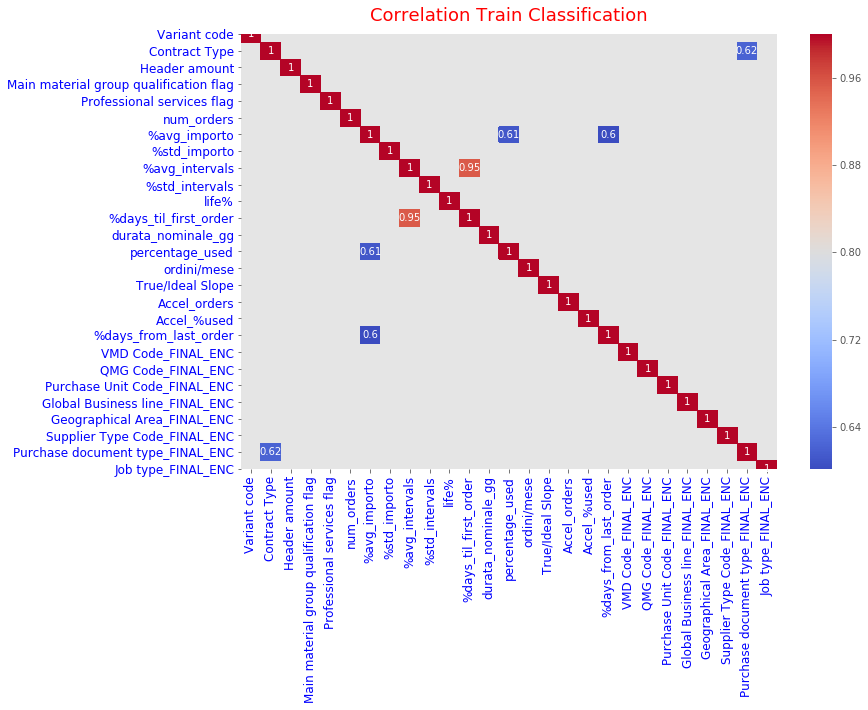

In [0]:
soglia = 0.6

title_ticks_ecc('Correlation Train Classification', '', '', figsize=(12, 8))
sns.heatmap(container_class['X_train'].corr()[abs(container_class['X_train'].corr())> soglia ], cmap= 'coolwarm', annot= True,)

In [0]:
container_class['X_train'].shape, container_class['X_test'].shape   # (232298, 25), (41158, 25)

((259053, 27), (45511, 27))

In [0]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',np.unique(ytrain_binary),ytrain_binary)
class_weights

array([0.70899611, 1.69619449])

In [0]:
import tensorflow as tf
import keras.backend as K

def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    # tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

In [0]:
def summary_classifier(classifier, x_train, y_train, y_test, predictions):
    
    diz={}
    diz['Train Accuracy']= round(accuracy_score(y_train, classifier.predict_classes(x_train)),3)
    diz['Test Accuracy'] =  round(accuracy_score(y_test, predictions),3)
    diz['Train F1']= round(f1_score(y_train, classifier.predict_classes(x_train), average='weighted'),3)
    diz['Test F1']=  round(f1_score(y_test, predictions, average='weighted'),3)

    #######AGGIUNGI CROSS VAL ACCURACY E F1 #############
    
    print('\n\033[1mtrain accuracy TP+TN/tot is {} \033[0m'.format(diz['Train Accuracy']))
    print('\033[1mtest accuracy TP+TN/tot is {} \033[0m'.format(diz['Test Accuracy']))
    #print("cross validation accuracy sul train è: ", cross_val_score(estimator = grid_fit.best_estimator_, X = scaled_train, y = Y_train, cv = 10).mean())
    print('\n\033[1mCLASSIFICATION REPORT\033[0m: \n', classification_report(y_test, predictions))
    print('\033[1mCONFUSION MATRIX\033[0m \n', confusion_matrix(y_test, predictions))
    #"""ROC CURVE SCORES (non esiste per multiclass classification)"""
    print('roc curve train is {a}, roc test is {b}'.format(a= roc_auc_score(y_train, classifier.predict_classes(x_train), average="weighted"), b= roc_auc_score(y_test, predictions, average="weighted")))
    print('\n\033[1mF1 train is {a}, F1 test is {b} \033[0m'.format(a= diz['Train F1'] , b= diz['Test F1']))
    
    return diz

In [0]:
def run_model(estimator, final_inputs_train, final_inputs_test, param_grid= None, random= False, verbose=2, cv=3, n_jobs= None,
               return_single_mod= True, return_results=True, n_to_show=5, early= None, class_weight=  class_weights, plot_metric= ['acc'],
              epochs= 1, batch_size= 2048):
    """estimator è il modello, caso puo essere: ['statico', 'rolling75', 'rolling25']. \n
    Return Grid Search estimator. """
    
    temp=time.time()

    ytrain= ytrain_binary
    ytest= ytest_binary
    X_train= final_inputs_train
    X_test= final_inputs_test

    if param_grid is None:
      history= estimator.fit(final_inputs_train, ytrain_binary, validation_split= 0.2, callbacks= [early], class_weight=  class_weights, epochs= epochs, batch_size= batch_size)
      
      plot_model_history(history, measures= plot_metric)
      preds= estimator.predict_classes(final_inputs_test)
      diz_summary= summary_classifier(estimator, final_inputs_train, ytrain, ytest, preds)
      #print('CON EVALUATE')
      #print('Performance on Train: ', history.model.evaluate(X_train, ytrain))
      #print('Performance on Test: ', history.model.evaluate(X_test, ytest))
      print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())
      if return_single_mod==True:
          return [history, diz_summary]
    
    else:
      ################## Divido Tra Randomized e non ##################
      if random== False:
        print('\n It is not a single model but a Grid Search \n')
        Grid_RF = GridSearchCV(estimator, param_grid, scoring='f1_weighted', cv=cv, return_train_score=True, 
                                n_jobs= n_jobs, verbose= verbose)
        

      else:
        print('\n It is not a single model but a (Randomized) Grid Search \n')
        Grid_RF = RandomizedSearchCV(estimator, param_distributions=param_grid, 
                                      scoring='f1_weighted', cv=cv, return_train_score=True, verbose= verbose, n_jobs= n_jobs)

      ################ Faccio il FIT ##################
      if early is None:
        Grid_RF.fit(X_train, ytrain, class_weight=  class_weights)
      else:
        Grid_RF.fit(X_train, ytrain, callbacks= [early], class_weight=  class_weights)
      
      ##################### statistiche ##################
        
      summary_grid(Grid_RF, X_train, ytrain, X_test, ytest)  
      print('execution time (min)=', round((time.time()-temp)/60, 1), ' finished at ', datetime.today())
      if return_results==True:
        print('best_results')
        print(df_cv_results(Grid_RF, n_to_show))
        
      return  Grid_RF 

In [0]:
def NN(nodi_hiddens= [64,32,16,8], with_dropout=True , dropout= 0.5, lr= 0.00001, n_layers= 1,
                loss_func= 'binary_crossentropy', metrics= ['accuracy', f1]):   #loss_func= 'mean_square_error', metrics= ['mse', 'mae', 'mape']

  model = Sequential()
  print('\n\033[1m Params modello: n_layers: {}, nodi_hiddens: {}, lr: {} \033[0m'.format(n_layers, nodi_hiddens, lr))
  for i in range (n_layers):
    if i==0:
      model.add(Dense(nodi_hiddens[0], input_dim=len(container_class['X_train'].columns), activation='relu'))
      if with_dropout== True:
        model.add(Dropout(rate= dropout))
    else:
      model.add(Dense(nodi_hiddens[i], activation='relu'))
      if with_dropout==True:
        model.add(Dropout(rate= dropout))

  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss= loss_func, optimizer= optimizers.Adam(lr= lr), metrics= metrics)  #fbeta_score(y_true, y_pred, beta=1)

  return model

<b> Trial Experiments

In [0]:
early = EarlyStopping(monitor='val_loss', mode='min', verbose=5, patience=5, min_delta= 3/100)  # Voglio 0.1% di miglioramento in 7 iterazioni
nn_base_one = KerasClassifier(build_fn=NN, epochs=10, batch_size=256, verbose=2)

param_grid = dict(
        n_layers= [1, 2],
        epochs= [2],
        batch_size= [2048],
        dropout= [0.5] )  #5% di prob di droppare un link

history_one= run_model(nn_base_one, container_class['X_train'], container_class['X_test'],  param_grid= param_grid, early= early)


 It is not a single model but a Grid Search 

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] batch_size=2048, dropout=0.5, epochs=2, n_layers=1 ..............


 Params modello: n_layers: 1, nodi_hiddens: [64, 32, 16, 8], lr: 1e-05 



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.





Epoch 1/2





 - 5s - loss: 0.8760 - acc: 0.6255 - f1: 0.2854
Epoch 2/2
 - 1s - loss: 0.8748 - acc: 0.6293 - f1: 0.2867
[CV]  batch_size=2048, dropout=0.5, epochs=2, n_layers=1, total=   6.6s
[CV] batch_size=2048, dropout=0.5, epochs=2, n_layers=1 ..............

 Params modello: n_layers: 1, nodi_hiddens: [64, 32, 16, 8], lr: 1e-05 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.8s remaining:    0.0s


Epoch 1/2
 - 1s - loss: 1.1115 - acc: 0.4668 - f1: 0.4299
Epoch 2/2
 - 1s - loss: 1.0866 - acc: 0.4743 - f1: 0.4262
[CV]  batch_size=2048, dropout=0.5, epochs=2, n_layers=1, total=   2.0s
[CV] batch_size=2048, dropout=0.5, epochs=2, n_layers=1 ..............

 Params modello: n_layers: 1, nodi_hiddens: [64, 32, 16, 8], lr: 1e-05 
Epoch 1/2
 - 1s - loss: 1.0850 - acc: 0.4398 - f1: 0.3453
Epoch 2/2
 - 1s - loss: 1.0728 - acc: 0.4500 - f1: 0.3427
[CV]  batch_size=2048, dropout=0.5, epochs=2, n_layers=1, total=   2.0s
[CV] batch_size=2048, dropout=0.5, epochs=2, n_layers=2 ..............

 Params modello: n_layers: 2, nodi_hiddens: [64, 32, 16, 8], lr: 1e-05 
Epoch 1/2
 - 1s - loss: 0.9022 - acc: 0.6313 - f1: 0.2163
Epoch 2/2
 - 1s - loss: 0.8907 - acc: 0.6307 - f1: 0.2215
[CV]  batch_size=2048, dropout=0.5, epochs=2, n_layers=2, total=   2.4s
[CV] batch_size=2048, dropout=0.5, epochs=2, n_layers=2 ..............

 Params modello: n_layers: 2, nodi_hiddens: [64, 32, 16, 8], lr: 1e-05 
Epoc

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   19.3s finished


Epoch 1/2
 - 1s - loss: 1.1005 - acc: 0.5007 - f1: 0.3891
Epoch 2/2
 - 1s - loss: 1.0636 - acc: 0.5141 - f1: 0.3865
best param combination:  {'batch_size': 2048, 'dropout': 0.5, 'epochs': 2, 'n_layers': 1}

 Train Accuracy is 0.529
 Test Accuracy is 0.528 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.73      0.53      0.61     32240
           1       0.31      0.52      0.39     13271

    accuracy                           0.53     45511
   macro avg       0.52      0.53      0.50     45511
weighted avg       0.61      0.53      0.55     45511

CONFUSION MATRIX 
 [[17091 15149]
 [ 6318  6953]]

F1 TRAIN: 0.549, 
VALIDATION F1 (averaged on 5 folds): 0.51  
F1 TEST: 0.55
execution time (min)= 0.4  finished at  2019-11-27 12:03:25.591832
best_results
  param_batch_size param_dropout param_epochs param_n_layers  mean_test_score  \
0             2048           0.5            2              1         0.509848   
1             2048   

In [0]:
df_cv_results(history_one)

,param_batch_size,param_dropout,param_epochs,param_n_layers,mean_test_score,mean_train_score
0,2048,0.5,2,1,0.509848,0.522157
1,2048,0.5,2,2,0.494597,0.466308


# Final Iterative optimization with manual Grid Search


	 ITERAZIONE 1/8

 n_layers: 1, batch_size: 128, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 64 

 Params modello: n_layers: 1, nodi_hiddens: [64, 32], lr: 0.001 
Train on 207242 samples, validate on 51811 samples
Epoch 1/70
207242/207242 [==============================] - 10s 47us/step - loss: 0.5540 - acc: 0.7474 - f1: 0.4303 - val_loss: 0.5770 - val_acc: 0.7092 - val_f1: 0.4486
Epoch 2/70
207242/207242 [==============================] - 9s 43us/step - loss: 0.4878 - acc: 0.7651 - f1: 0.4543 - val_loss: 0.5626 - val_acc: 0.7083 - val_f1: 0.4778
Epoch 3/70
207242/207242 [==============================] - 9s 43us/step - loss: 0.4725 - acc: 0.7699 - f1: 0.4712 - val_loss: 0.5551 - val_acc: 0.7103 - val_f1: 0.4907
Epoch 4/70
207242/207242 [==============================] - 9s 43us/step - loss: 0.4653 - acc: 0.7726 - f1: 0.4835 - val_loss: 0.5526 - val_acc: 0.7126 - val_f1: 0.4986
Epoch 5/70
207242/207242 [==============================] - 9s 43us/step - loss: 0.4607 - acc: 0.7743 - f1: 0.4

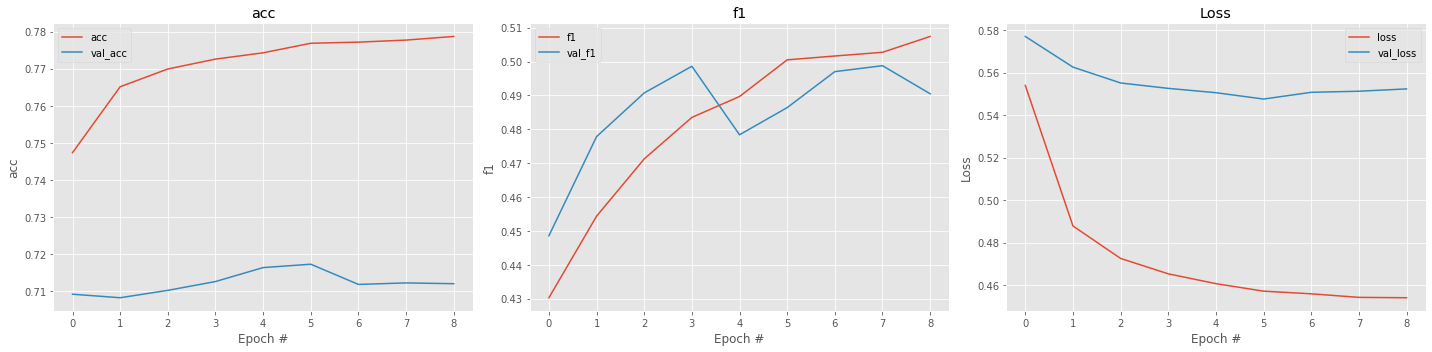


train accuracy TP+TN/tot is 0.77 
test accuracy TP+TN/tot is 0.772 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85     32240
           1       0.65      0.46      0.54     13271

    accuracy                           0.77     45511
   macro avg       0.73      0.68      0.70     45511
weighted avg       0.76      0.77      0.76     45511

CONFUSION MATRIX 
 [[28961  3279]
 [ 7107  6164]]
roc curve train is 0.6809610408173083, roc test is 0.6813827242389187

F1 train is 0.757, F1 test is 0.759 
execution time (min)= 1.7  finished at  2019-11-27 12:05:09.883920

	 ITERAZIONE 2/8

 n_layers: 1, batch_size: 128, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 16 

 Params modello: n_layers: 1, nodi_hiddens: [16, 16], lr: 0.001 
Train on 207242 samples, validate on 51811 samples
Epoch 1/70
207242/207242 [==============================] - 10s 48us/step - loss: 0.5903 - acc: 0.7304 - f1: 0.3407 - val_loss: 0.5754 - val_

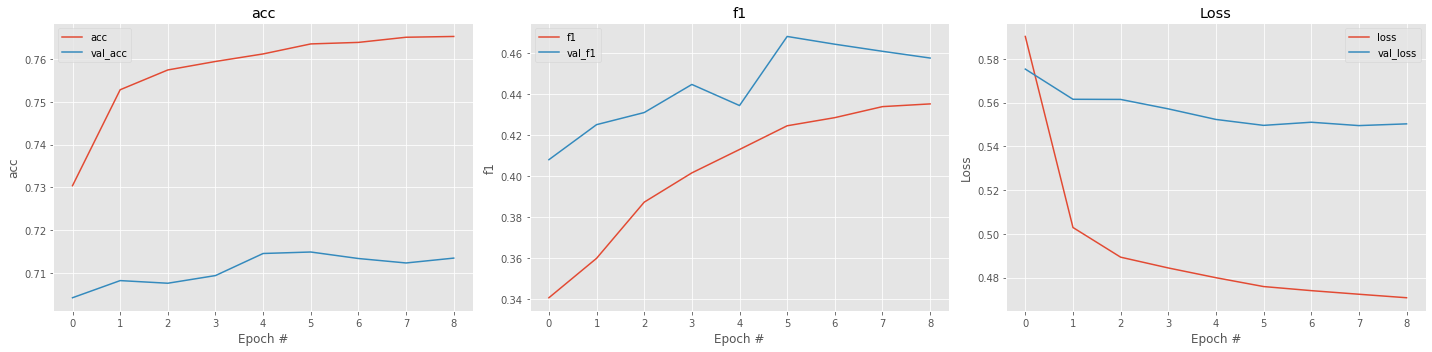


train accuracy TP+TN/tot is 0.762 
test accuracy TP+TN/tot is 0.762 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.78      0.91      0.84     32240
           1       0.65      0.39      0.49     13271

    accuracy                           0.76     45511
   macro avg       0.72      0.65      0.67     45511
weighted avg       0.75      0.76      0.74     45511

CONFUSION MATRIX 
 [[29483  2757]
 [ 8097  5174]]
roc curve train is 0.6540790530694426, roc test is 0.6521788831615345

F1 train is 0.74, F1 test is 0.741 
execution time (min)= 1.7  finished at  2019-11-27 12:06:54.310922

	 ITERAZIONE 3/8

 n_layers: 2, batch_size: 128, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 64 
 nodi_hidden2 : 32 

 Params modello: n_layers: 2, nodi_hiddens: [64, 32], lr: 0.001 
Train on 207242 samples, validate on 51811 samples
Epoch 1/70
207242/207242 [==============================] - 11s 53us/step - loss: 0.5578 - acc: 0.7354 - f1: 0.3418 - val

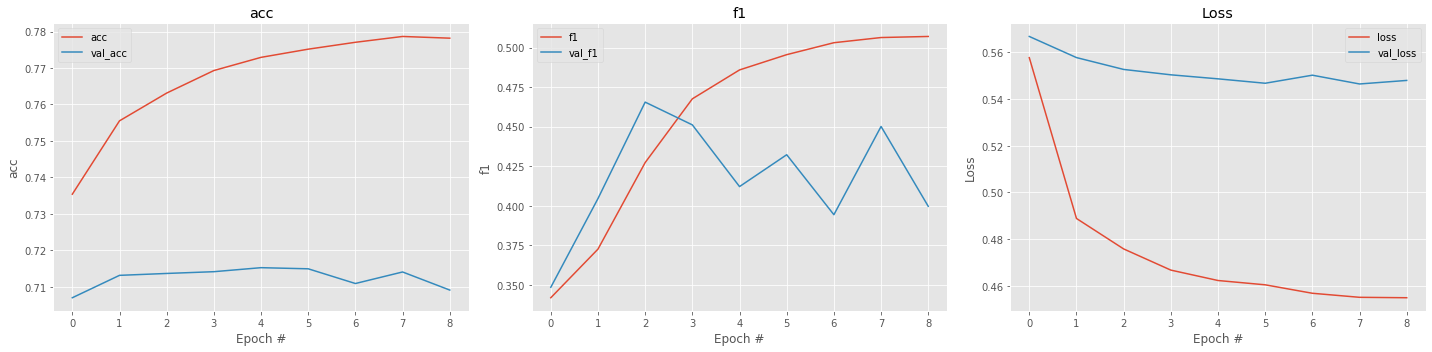


train accuracy TP+TN/tot is 0.771 
test accuracy TP+TN/tot is 0.773 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.79      0.93      0.85     32240
           1       0.69      0.40      0.50     13271

    accuracy                           0.77     45511
   macro avg       0.74      0.66      0.68     45511
weighted avg       0.76      0.77      0.75     45511

CONFUSION MATRIX 
 [[29914  2326]
 [ 8017  5254]]
roc curve train is 0.6616404114607843, roc test is 0.661877217212553

F1 train is 0.749, F1 test is 0.751 
execution time (min)= 1.9  finished at  2019-11-27 12:08:49.181257

	 ITERAZIONE 4/8

 n_layers: 2, batch_size: 128, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 16 
 nodi_hidden2 : 16 

 Params modello: n_layers: 2, nodi_hiddens: [16, 16], lr: 0.001 
Train on 207242 samples, validate on 51811 samples
Epoch 1/70
207242/207242 [==============================] - 11s 53us/step - loss: 0.5798 - acc: 0.7204 - f1: 0.1981 - val

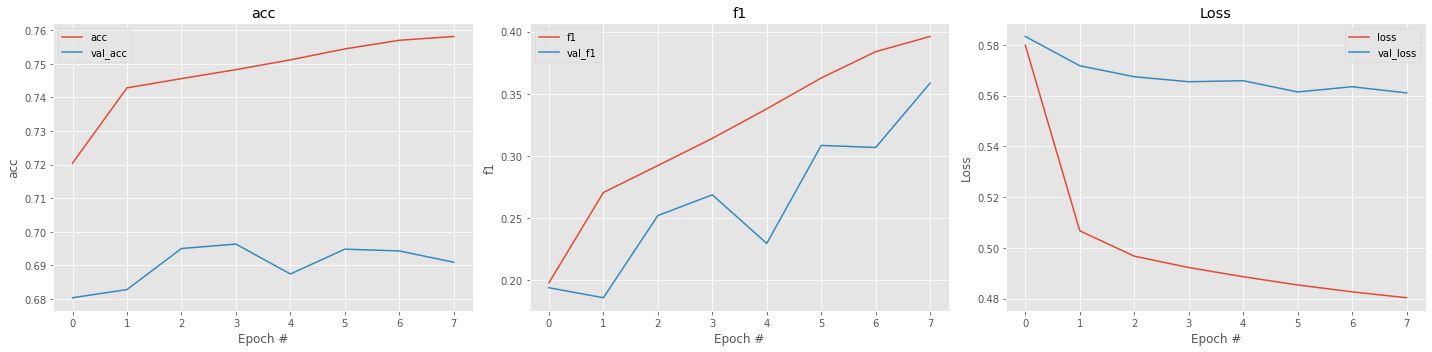


train accuracy TP+TN/tot is 0.753 
test accuracy TP+TN/tot is 0.755 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.76      0.95      0.85     32240
           1       0.71      0.28      0.40     13271

    accuracy                           0.76     45511
   macro avg       0.73      0.61      0.62     45511
weighted avg       0.75      0.76      0.72     45511

CONFUSION MATRIX 
 [[30724  1516]
 [ 9619  3652]]
roc curve train is 0.614728798538048, roc test is 0.6140820821833387

F1 train is 0.713, F1 test is 0.715 
execution time (min)= 1.8  finished at  2019-11-27 12:10:35.109410

	 ITERAZIONE 5/8

 n_layers: 1, batch_size: 256, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 64 

 Params modello: n_layers: 1, nodi_hiddens: [64, 32], lr: 0.001 
Train on 207242 samples, validate on 51811 samples
Epoch 1/70
207242/207242 [==============================] - 6s 28us/step - loss: 0.5743 - acc: 0.7448 - f1: 0.4328 - val_loss: 0.5910 - val_a

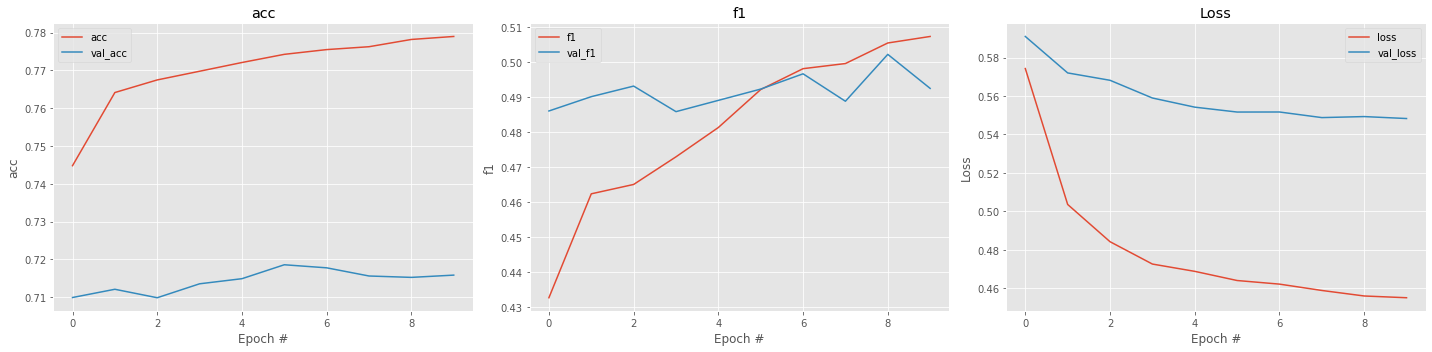


train accuracy TP+TN/tot is 0.77 
test accuracy TP+TN/tot is 0.771 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85     32240
           1       0.66      0.44      0.53     13271

    accuracy                           0.77     45511
   macro avg       0.73      0.67      0.69     45511
weighted avg       0.76      0.77      0.76     45511

CONFUSION MATRIX 
 [[29305  2935]
 [ 7481  5790]]
roc curve train is 0.6734852593982669, roc test is 0.6726268369920945

F1 train is 0.754, F1 test is 0.755 
execution time (min)= 1.2  finished at  2019-11-27 12:11:46.862429

	 ITERAZIONE 6/8

 n_layers: 1, batch_size: 256, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 16 

 Params modello: n_layers: 1, nodi_hiddens: [16, 16], lr: 0.001 
Train on 207242 samples, validate on 51811 samples
Epoch 1/70
207242/207242 [==============================] - 6s 28us/step - loss: 0.5872 - acc: 0.7305 - f1: 0.3484 - val_loss: 0.5928 - val_a

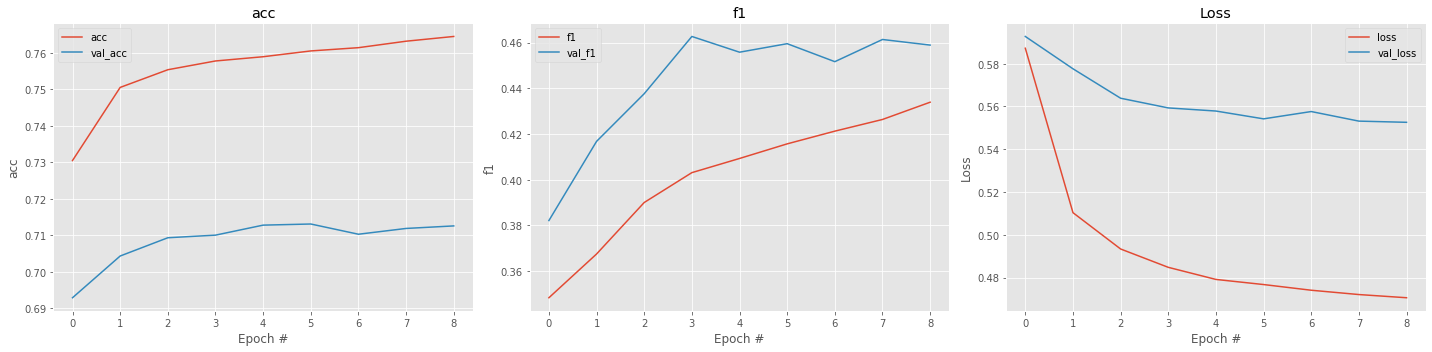


train accuracy TP+TN/tot is 0.758 
test accuracy TP+TN/tot is 0.76 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.78      0.92      0.84     32240
           1       0.65      0.38      0.48     13271

    accuracy                           0.76     45511
   macro avg       0.72      0.65      0.66     45511
weighted avg       0.74      0.76      0.74     45511

CONFUSION MATRIX 
 [[29576  2664]
 [ 8275  4996]]
roc curve train is 0.6474324781185146, roc test is 0.6469148386573235

F1 train is 0.736, F1 test is 0.737 
execution time (min)= 1.1  finished at  2019-11-27 12:12:55.149698

	 ITERAZIONE 7/8

 n_layers: 2, batch_size: 256, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 64 
 nodi_hidden2 : 32 

 Params modello: n_layers: 2, nodi_hiddens: [64, 32], lr: 0.001 
Train on 207242 samples, validate on 51811 samples
Epoch 1/70
207242/207242 [==============================] - 6s 31us/step - loss: 0.5649 - acc: 0.7337 - f1: 0.3448 - val_

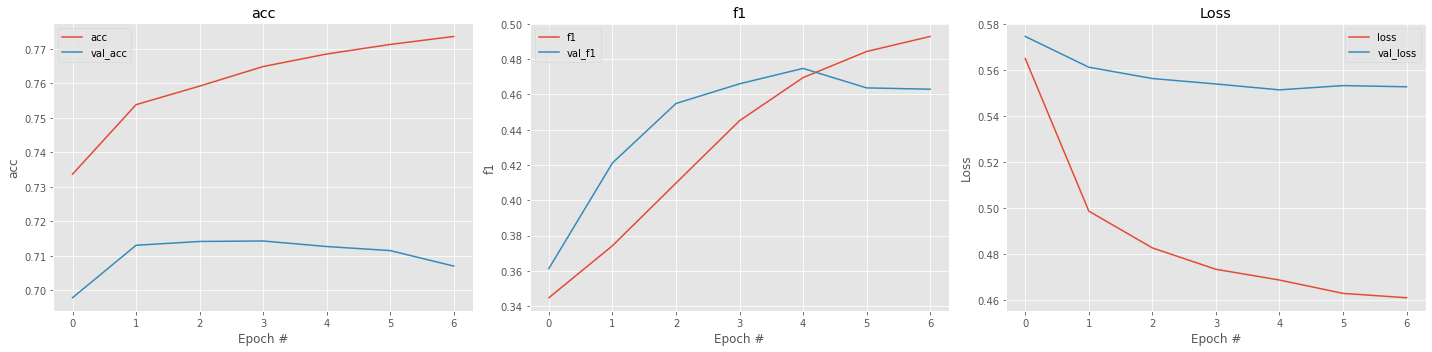


train accuracy TP+TN/tot is 0.768 
test accuracy TP+TN/tot is 0.769 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.79      0.91      0.85     32240
           1       0.66      0.43      0.52     13271

    accuracy                           0.77     45511
   macro avg       0.73      0.67      0.68     45511
weighted avg       0.75      0.77      0.75     45511

CONFUSION MATRIX 
 [[29312  2928]
 [ 7601  5670]]
roc curve train is 0.6693653932731864, roc test is 0.6682142614738792

F1 train is 0.751, F1 test is 0.752 
execution time (min)= 1.1  finished at  2019-11-27 12:13:59.335311

	 ITERAZIONE 8/8

 n_layers: 2, batch_size: 256, dropout: 0.5, lr: 0.001 
 nodi_hidden1 : 16 
 nodi_hidden2 : 16 

 Params modello: n_layers: 2, nodi_hiddens: [16, 16], lr: 0.001 
Train on 207242 samples, validate on 51811 samples
Epoch 1/70
207242/207242 [==============================] - 7s 32us/step - loss: 0.6624 - acc: 0.6811 - f1: 0.1275 - val

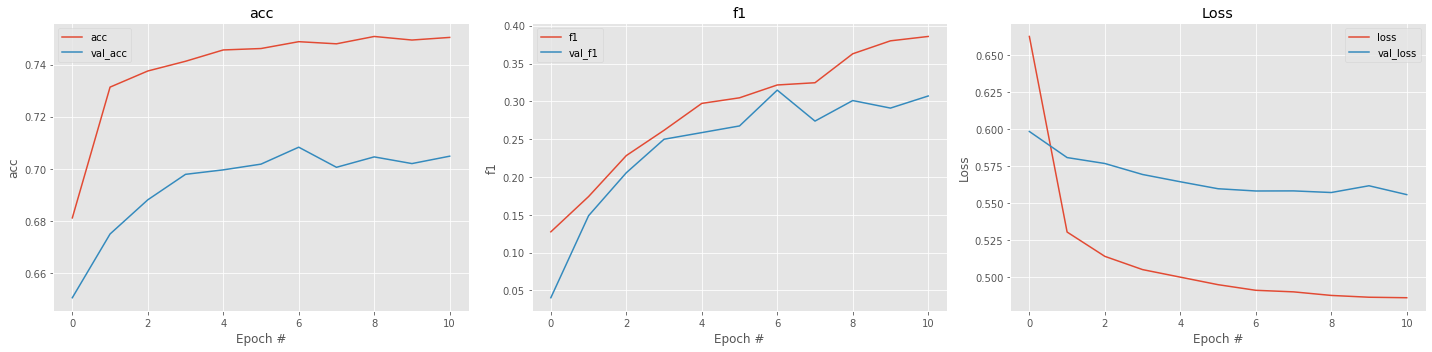


train accuracy TP+TN/tot is 0.75 
test accuracy TP+TN/tot is 0.751 

CLASSIFICATION REPORT: 
               precision    recall  f1-score   support

           0       0.75      0.96      0.85     32240
           1       0.73      0.24      0.36     13271

    accuracy                           0.75     45511
   macro avg       0.74      0.60      0.60     45511
weighted avg       0.75      0.75      0.70     45511

CONFUSION MATRIX 
 [[31076  1164]
 [10151  3120]]
roc curve train is 0.6003004686168104, roc test is 0.5994974349376138

F1 train is 0.701, F1 test is 0.703 
execution time (min)= 1.4  finished at  2019-11-27 12:15:24.946289


In [0]:
early = EarlyStopping(monitor='val_acc', mode='max', verbose=4, patience=4, min_delta= 0.001)

#nn_base_one = KerasClassifier(build_fn=NN, epochs=10, batch_size=256, verbose=2)

param_grid = dict(
        n_layers= [1,2 ],
        nodi_hiddens= [[64,32], [16, 16]],
        epochs= [70],
        batch_size= [128, 256],
        dropout= [0.5] ,
        lr= [1e-03]) 


l=[]
iteration=1

for diz in list(ParameterGrid(param_grid)):
  print('\n\t ITERAZIONE {}/{}'.format(iteration, len(list(ParameterGrid(param_grid)))))
  n_layers= diz['n_layers']
  nodi_hiddens= diz['nodi_hiddens']
  batch_size= diz['batch_size']
  dropout= diz['dropout']
  epochs= diz['epochs']
  lr= diz['lr']
  print('\n\033[1m n_layers: {}, batch_size: {}, dropout: {}, lr: {} \033[0m'.format(n_layers, batch_size, dropout, lr))
  for i in range(n_layers):
      print('\033[1m nodi_hidden{} : {} \033[0m'.format(str(i+1), str(nodi_hiddens[i]) ))
  
  nn = NN(nodi_hiddens= nodi_hiddens, dropout= dropout, lr= lr, n_layers= n_layers, metrics= ['acc', f1])
  history_one= run_model(nn, container_class['X_train'], container_class['X_test'], early= early, plot_metric= ['acc', 'f1', 'loss'], epochs= epochs, batch_size= batch_size)
  
  l.append(history_one)
  iteration+=1


In [0]:
#@title
def results_hand_grid( lista_histories= l, param_grid= param_grid, columns= ['batch_size', 'dropout', 'Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1']):

  iteraz=0
  
  results_emb_1h= pd.DataFrame(columns= columns )

  for diz in list(ParameterGrid(param_grid)):
    res= lista_histories[iteraz][1]

    df= pd.DataFrame([
    diz['n_layers'], diz['nodi_hiddens'],
    diz['batch_size'],
    diz['dropout'],
    diz['lr'],
    res['Train Accuracy'],
    res['Test Accuracy'],
    res['Train F1'],
    res['Test F1']   ,]).T

    df.columns= columns
    
    #print(df)
    results_emb_1h= results_emb_1h.append(df, ignore_index=True)

    iteraz+=1
  return results_emb_1h.sort_values(by= 'Test F1', ascending= False)

In [0]:
columns= ['n_layers', 'nodi_hiddens', 'batch_size', 'dropout', 'lr', 'Train Accuracy', 'Test Accuracy', 'Train F1', 'Test F1']
results_hand_grid(l, param_grid, columns )

,n_layers,nodi_hiddens,batch_size,dropout,lr,Train Accuracy,Test Accuracy,Train F1,Test F1
0,1,"[64, 32]",128,0.5,0.001,0.77,0.772,0.757,0.759
4,1,"[64, 32]",256,0.5,0.001,0.77,0.771,0.754,0.755
6,2,"[64, 32]",256,0.5,0.001,0.768,0.769,0.751,0.752
2,2,"[64, 32]",128,0.5,0.001,0.771,0.773,0.749,0.751
1,1,"[16, 16]",128,0.5,0.001,0.762,0.762,0.74,0.741
5,1,"[16, 16]",256,0.5,0.001,0.758,0.76,0.736,0.737
3,2,"[16, 16]",128,0.5,0.001,0.753,0.755,0.713,0.715
7,2,"[16, 16]",256,0.5,0.001,0.75,0.751,0.701,0.703


### Analyzing error based on lifetime%

In [0]:
best_nn_class= l[0][0].model

In [0]:
def analisi_err_class(best_model, is_NN= True, container= None, model_name= None, X_test= None, ytest= None):
    
    if X_test is not None and ytest is not None:
        X= X_test
        y= ytest
    else:
        X= container['X_test']
        y= container['ytest']
    
    lifes= list(X['life%'].unique())
    voting_clean= pd.DataFrame(columns= [model_name])
    if is_NN is True:
        voting_clean['RF']= pd.DataFrame(best_model.predict(cont_class['X_test'])).squeeze()
    else:
        voting_clean['RF']= best_model.predict_proba(X)[:, 1]
        
    voting_clean['LABEL']= y.values
    voting_clean['life%']= X['life%'].values
    voting_clean['life%']= voting_clean['life%'].map(dict(zip(sorted(voting_clean['life%'].unique()), lifes)))

    voting_clean['Preds_' + model_name]= voting_clean['RF'].apply(lambda x: 1 if x>= 0.5 else 0)
    
    life_scores= dict()
    models= [model_name]
    for model in models:
        life_scores[model]= {}
        for life in lifes: 
            life_scores[model][life]= {'acc': 0, 'F1':0}
    
    for model in models:
        for i,life in enumerate(sorted(voting_clean['life%'].unique())):
            df_life= voting_clean[voting_clean['life%']== life]

            life_scores[model][lifes[i]]['% samples']= round((100*len(df_life)/len(voting_clean)),3)
            life_scores[model][lifes[i]]['acc'] = round(accuracy_score(df_life['LABEL'], df_life['Preds_' + model]), 3)
            life_scores[model][lifes[i]]['F1'] = round(f1_score(df_life['LABEL'], df_life['Preds_' + model], average= 'weighted'),3)

            life_scores[model][lifes[i]]['FPrate']= round(len(voting_clean[(voting_clean['LABEL']==0) & (voting_clean['Preds_' + model]==1)])/len(df_life),3)  #Predico 2, positive, ma è 0, negative. FP
            life_scores[model][lifes[i]]['FNrate']= round(len(voting_clean[(voting_clean['LABEL']==1) & (voting_clean['Preds_' + model]==0)])/len(df_life),3)  #FN
            
    df_life_scores= pd.DataFrame(life_scores[model_name]).T

    df_life_scores=df_life_scores.set_index('% samples').reset_index()
    df_life_scores.index= [ str(value*10)+'% life' for value in df_life_scores.index]

    return df_life_scores[['% samples', 'acc', 'F1' ]]

In [0]:
lifes= list(cont_class['X_test']['life%'].unique())

voting_clean= pd.DataFrame()
voting_clean['NN']= pd.DataFrame(best_nn_class.predict(cont_class['X_test'])).squeeze()
voting_clean['LABEL']= cont_class['ytest'].values
voting_clean['life%']= cont_class['X_test']['life%'].values
voting_clean['life%']= voting_clean['life%'].map(dict(zip(sorted(voting_clean['life%'].unique()), lifes)))

voting_clean['Preds_NN']= voting_clean['NN'].apply(lambda x: 1 if x>= 0.5 else 0)

voting_clean.head()

,NN,LABEL,life%,Preds_NN
0,0.320031,1,-0.8,0
1,0.273405,1,-0.6,0
2,0.383917,1,-0.4,0
3,0.400889,1,-0.2,0
4,0.434482,1,0.0,0


In [0]:
life_scores= dict()

models= ['NN']

for model in models:
    life_scores[model]= {}
    for life in lifes: 
        life_scores[model][life]= {'acc': 0, 'F1':0}
    
for model in models:
    for i,life in enumerate(sorted(voting_clean['life%'].unique())):
        df_life= voting_clean[voting_clean['life%']== life]
        
        life_scores[model][lifes[i]]['% samples']= round((100*len(df_life)/len(voting_clean)),3)
        life_scores[model][lifes[i]]['acc'] = round(accuracy_score(df_life['LABEL'], df_life['Preds_' + model]), 3)
        life_scores[model][lifes[i]]['F1'] = round(f1_score(df_life['LABEL'], df_life['Preds_' + model], average= 'weighted'),3)

        life_scores[model][lifes[i]]['FPrate']= round(len(voting_clean[(voting_clean['LABEL']==0) & (voting_clean['Preds_' + model]==1)])/len(df_life),3)  #Predico 2, positive, ma è 0, negative. FP
        life_scores[model][lifes[i]]['FNrate']= round(len(voting_clean[(voting_clean['LABEL']==1) & (voting_clean['Preds_' + model]==0)])/len(df_life),3)  #FN

In [0]:
df_life_scores= pd.DataFrame(life_scores['NN']).T

df_life_scores=df_life_scores.set_index('% samples').reset_index()
df_life_scores.index= [ str(value*10)+'% life' for value in df_life_scores.index]

df_life_scores[['% samples', 'acc', 'F1',]]

,% samples,acc,F1
0% life,12.459,0.721,0.718
10% life,11.235,0.719,0.712
20% life,10.736,0.730,0.719
30% life,10.435,0.741,0.727
40% life,10.121,0.756,0.739
50% life,9.804,0.776,0.758
60% life,9.455,0.795,0.777
70% life,9.101,0.814,0.793
80% life,8.640,0.846,0.824
90% life,8.016,0.882,0.859


In [0]:
np.mean(df_life_scores['F1']), np.average(df_life_scores['F1'], weights= df_life_scores['% samples']) 

(0.7626, 0.7572837943241134)